In [6]:
from pylsl import StreamInlet, resolve_stream, resolve_byprop
streams = resolve_byprop("name", "UN-2019.05.50", minimum=1, timeout=30)
streams

### Check distribution of time delays

In [27]:
from pylsl import StreamInfo, StreamInlet, StreamOutlet, resolve_stream
import pandas as pd
import time

# initialize the streaming layer
finished = False
streams = resolve_byprop("name", "UN-2019.05.50", minimum=1)

#Create the stream inlet 
inlet = StreamInlet(streams[0])

#initialize the colomns of your data and your dictionary to capture the data.
columns=['Time','FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8','AccX','AccY','AccZ',
'Gyro1','Gyro2','Gyro3', 'Battery','Counter','Validation']
data_dict = dict((k, []) for k in columns)
x=0
delay_list = []
old_timestamp = None
while x < 10000: #not finished:
   # get the streamed data. Columns of sample are equal to the columns variable, only the first element being timestamp
   # concatenate timestamp and data in 1 list
   data, timestamp = inlet.pull_chunk(timeout=1.0, max_samples=500) #get all samples for the 2 seconds
   data, timestamp = inlet.pull_sample()
   #timestamp = timestamp+inlet.time_correction()
   #all_data = [timestamp] + data
   
   if old_timestamp:
      delay_list.append((timestamp - old_timestamp)*1000)
   old_timestamp = timestamp

   x+=1
   # # updating data dictionary with newly transmitted samples   
   # i = 0
   # for key in list(data_dict.keys()):
   #    data_dict[key].append(all_data[i])
   #    i = i + 1
      
   # # data is collected at 250 Hz. Let's stop data collection after 60 seconds. Meaning we stop when we collected 250*60 samples.
   # if len(data_dict['Time']) >= 250*10:
   #    finished = True

inlet.close_stream()
# lastly, we can save our data to a CSV format.
data_df = pd.DataFrame.from_dict(data_dict)
# data_df.to_csv('EEGdata.csv', index = False) 

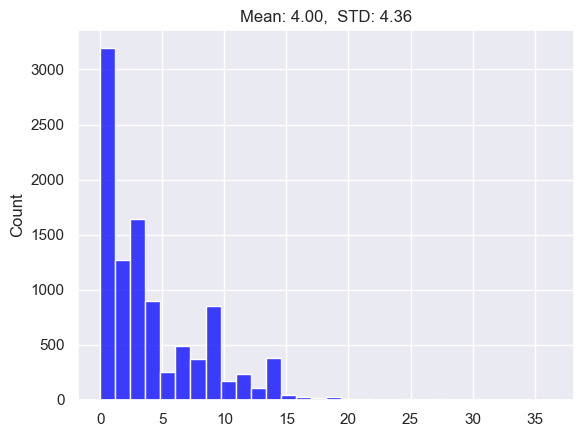

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy.stats import norm
import numpy as np

# Some sample data
data = np.array(delay_list)

# Create histogram
sns.histplot(data, kde=False, color='blue', bins=30)

# Get histogram data
count, bins = np.histogram(data, 30)

# Fit a normal distribution to the data
mean = data.mean()
std = data.std()

title = "Mean: %.2f,  STD: %.2f" % (mean, std)
plt.title(title)

plt.show()


In [24]:
len(delay_list)

999

In [21]:
from pylsl import StreamInfo, StreamInlet, StreamOutlet, resolve_stream
import pandas as pd
import time

# initialize the streaming layer
finished = False
streams = resolve_byprop("name", "UN-2019.05.50", minimum=1)

#Create the stream inlet 
inlet = StreamInlet(streams[0])

#initialize the colomns of your data and your dictionary to capture the data.
columns=['Time','FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8','AccX','AccY','AccZ',
'Gyro1','Gyro2','Gyro3', 'Battery','Counter','Validation']
data_dict = dict((k, []) for k in columns)
x=0
time_list = []
old_timestamp = None
while x < 1000: #not finished:
   # get the streamed data. Columns of sample are equal to the columns variable, only the first element being timestamp
   # concatenate timestamp and data in 1 list
   #data, timestamp = inlet.pull_sample()
   data, timestamp = inlet.pull_sample()
   #timestamp = timestamp+inlet.time_correction()
   #all_data = [timestamp] + data
   time_list.append(timestamp)
   # if old_timestamp:
   #    print((timestamp - old_timestamp)*1000)
   # old_timestamp = timestamp
   x+=1
   # # updating data dictionary with newly transmitted samples   
   # i = 0
   # for key in list(data_dict.keys()):
   #    data_dict[key].append(all_data[i])
   #    i = i + 1
      
   # # data is collected at 250 Hz. Let's stop data collection after 60 seconds. Meaning we stop when we collected 250*60 samples.
   # if len(data_dict['Time']) >= 250*10:
   #    finished = True

inlet.close_stream()
# lastly, we can save our data to a CSV format.
data_df = pd.DataFrame.from_dict(data_dict)
# data_df.to_csv('EEGdata.csv', index = False) 

In [22]:
time_list

[24314.8761256,
 24314.8761407,
 24314.8891973,
 24314.892305,
 24314.8923195,
 24314.8942919,
 24314.8988726,
 24314.9067657,
 24314.9097794,
 24314.9097976]

In [ ]:
for i in range(len(timestamp)):
    if i < len(timestamp)-1:
        print((timestamp[i+1]-timestamp[i])*1000)

In [32]:
(9051.7363938-9051.7573378)*1000

-20.943999999872176

In [27]:
from datetime import datetime
timestamp = data_dict["Time"][0]
datetime.fromtimestamp(timestamp)

datetime.datetime(1969, 12, 31, 19, 58, 0, 864624)

In [ ]:
for i in range(len(data_dict["Time"])):
    if i < len(data_dict["Time"])-1:
        print((data_dict["Time"][i+1]-data_dict["Time"][i])*1000)

In [20]:
(data_df['Time'][504] - data_df['Time'][755])*1000

-999.2842999999993

In [5]:
data_df

,Time,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8,AccX,AccY,AccZ,Gyro1,Gyro2,Gyro3,Battery,Counter,Validation
0,3107.726995,275591.03125,275537.46875,275944.18750,275876.68750,275782.00000,275888.21875,276055.15625,276337.75000,-0.479492,0.009033,-0.882324,-0.671387,1.953125,1.007080,73.333336,17550.0,1.0
1,3107.727017,275613.90625,275560.28125,275967.00000,275899.75000,275804.81250,275911.28125,276078.12500,276360.46875,-0.479248,0.009521,-0.883301,-0.701904,1.861572,0.915527,73.333336,17551.0,1.0
2,3107.730814,275599.71875,275546.06250,275952.78125,275885.53125,275790.68750,275896.90625,276064.09375,276346.62500,-0.480957,0.010010,-0.885498,-0.671387,1.953125,0.976562,73.333336,17552.0,1.0
3,3107.730831,275584.93750,275530.93750,275937.46875,275870.15625,275775.84375,275881.68750,276049.06250,276331.68750,-0.480225,0.010254,-0.884766,-0.732422,1.953125,1.007080,73.333336,17553.0,1.0
4,3107.730835,275609.43750,275555.90625,275962.06250,275895.03125,275800.50000,275906.62500,276073.46875,276356.00000,-0.479980,0.009277,-0.879150,-0.701904,1.953125,0.946045,73.333336,17554.0,1.0
5,3107.730838,275638.06250,275584.31250,275990.87500,275923.71875,275828.84375,275935.53125,276102.00000,276384.87500,-0.480469,0.010010,-0.875732,-0.732422,1.922607,0.946045,73.333336,17555.0,1.0
6,3107.733355,275629.65625,275576.37500,275982.37500,275915.31250,275820.62500,275926.84375,276093.59375,276376.56250,-0.480469,0.009521,-0.882080,-0.671387,1.922607,0.976562,73.333336,17556.0,1.0
7,3107.733372,275613.37500,275560.18750,275966.53125,275899.31250,275804.28125,275910.65625,276077.40625,276360.56250,-0.481934,0.010742,-0.883545,-0.701904,1.892090,0.976562,73.333336,17557.0,1.0
8,3107.735308,275634.12500,275580.40625,275986.75000,275919.87500,275824.65625,275930.87500,276097.68750,276380.75000,-0.481689,0.011230,-0.882812,-0.854492,2.014160,1.037598,73.333336,17558.0,1.0
9,3107.749707,275667.84375,275614.09375,276020.28125,275953.50000,275858.90625,275964.65625,276131.59375,276414.46875,-0.480957,0.012207,-0.881104,-0.701904,2.014160,0.976562,73.333336,17559.0,1.0
